<a href="https://colab.research.google.com/github/undanielrojo/Trabajos_salle/blob/main/Copia_de_Te_damos_la_bienvenida_a_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#trabajo tercer corte 


Santiago Yate - 63202046 Daniel Carranza - 63171111

In [ ]:
!pip install wooldridge pingouin missingno

import wooldridge as wd
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import scipy.stats as st
import pingouin as pg

import missingno as ms

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.impute import KNNImputer, MissingIndicator
from scipy.spatial.distance import mahalanobis

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/unisalledatos/machine_learning/main/marketing_campaign.csv', sep ="\t")

In [3]:
dataset


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [4]:
dataset.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
dataset.tail(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
dataset.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [8]:
dataset["Dt_Customer"]= pd.to_datetime(dataset["Dt_Customer"])

<ipython-input-8-a6ea20b5530c>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dataset["Dt_Customer"]= pd.to_datetime(dataset["Dt_Customer"])


In [9]:
dataset_1 = dataset.select_dtypes("object")

In [10]:
dataset_1

,Education,Marital_Status
0,Graduation,Single
1,Graduation,Single
2,Graduation,Together
3,Graduation,Together
4,PhD,Married
...,...,...
2235,Graduation,Married
2236,PhD,Together
2237,Graduation,Divorced
2238,Master,Together


In [11]:
dataset_2 = dataset.drop(columns=dataset_1.columns)
dataset_2

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,58138.0,0,0,2012-04-09,58,635,88,546,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,46344.0,1,1,2014-08-03,38,11,1,6,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,71613.0,0,0,2013-08-21,26,426,49,127,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,26646.0,1,0,2014-10-02,26,11,4,20,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,58293.0,1,0,2014-01-19,94,173,43,118,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223.0,0,1,2013-06-13,46,709,43,182,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,64014.0,2,1,2014-10-06,56,406,0,30,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,56981.0,0,0,2014-01-25,91,908,48,217,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,69245.0,0,1,2014-01-24,8,428,30,214,...,3,0,0,0,0,0,0,3,11,0


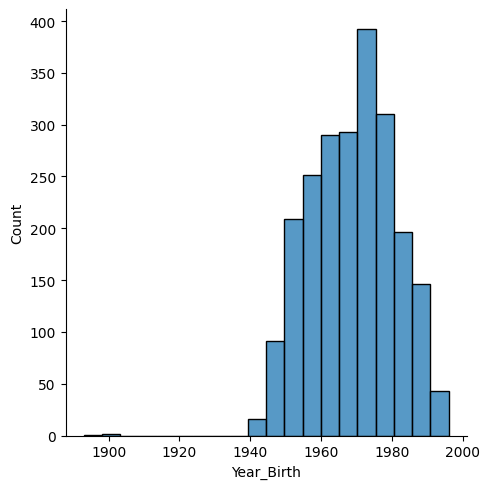

In [12]:
sns.displot(dataset, x="Year_Birth", bins = 20)


gráfico de distribución de los valores de la variable "Year_Birth" del conjunto de personas en el "dataset"

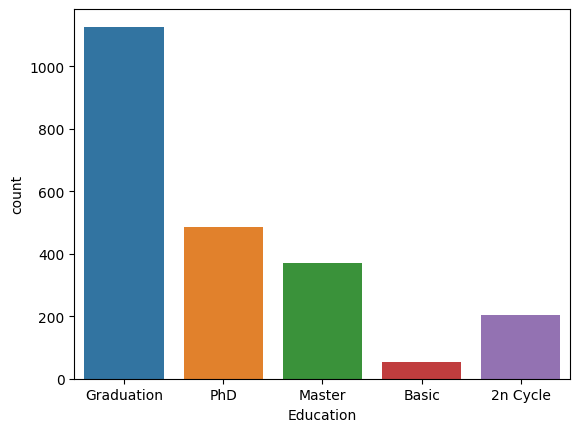

In [13]:
sns.countplot(data=dataset, x="Education")
plt.show()

gráfico de recuento que muestra la distribución de la variable "Education" en el conjunto de personas en el "dataset". Este gráfico representa la cantidad de personas para cada categoría de "Education"

In [14]:
dataset['Marital_Status'].value_counts(normalize=True)

Married     0.385714
Together    0.258929
Single      0.214286
Divorced    0.103571
Widow       0.034375
Alone       0.001339
Absurd      0.000893
YOLO        0.000893
Name: Marital_Status, dtype: float64

a frecuencia relativa (medida para comprender la distribucion de los valores) de cada valor único en la columna "Marital_Status" del conjunto de datos "dataset"

In [15]:
dataset = (dataset
        .replace({'Alone':'Single',
                  'Absurd':'Single','YOLO':'Single'}))
dataset['Marital_Status'].value_counts()

Married     864
Together    580
Single      487
Divorced    232
Widow        77
Name: Marital_Status, dtype: int64

 el conjunto de datos "dataset" al reemplazar los valores 'Alone', 'Absurd' y 'YOLO' en la columna "Marital_Status" con el valor 'Single', y luego cuenta la frecuencia de cada valor único en la columna "Marital_Status" después de la transformación. Esto permite obtener una visión actualizada de la distribución de los estados civiles, donde los valores 'Alone', 'Absurd' y 'YOLO' se agrupan y se muestran como 'Single'.

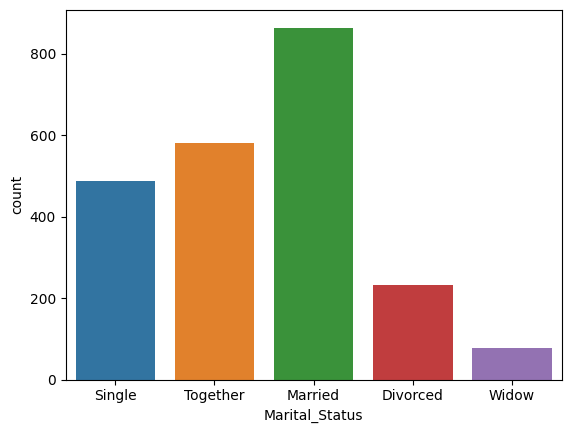

In [16]:
sns.countplot(data=dataset, x="Marital_Status")
plt.show()

gráfico de recuento que muestra la distribución de la variable "Marital_Status" en el conjunto de personas de "dataset". El gráfico representa la cantidad para cada categoría de "Marital_Status", proporcionando una visión general de la frecuencia de cada estado civil en el conjunto de personas contadas.

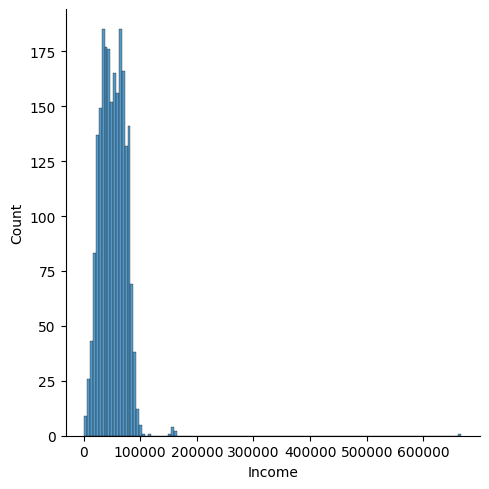

In [ ]:
sns.displot(dataset, x="Income")

gráfico de distribución que representa la distribución de los valores de ingresos en el conjunto de personas de los datos "dataset".

In [17]:
#plt.boxplot(dataset, x="Income")



<Axes: xlabel='Kidhome', ylabel='Count'>

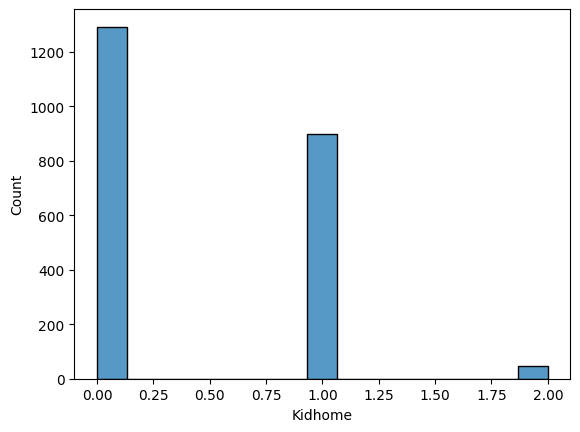

In [21]:

sns.histplot(data=dataset, x='Kidhome', bins=15)

gráfico de recuento que muestra la distribución de la variable "Kidhome" en el conjunto de personas de la data "dataset". El gráfico representa la cantidad de personas para cada categoría relacionada con la presencia de niños en el hogar, lo que proporciona una visión general de la frecuencia de cada categoría en el conjunto de personas de la data.

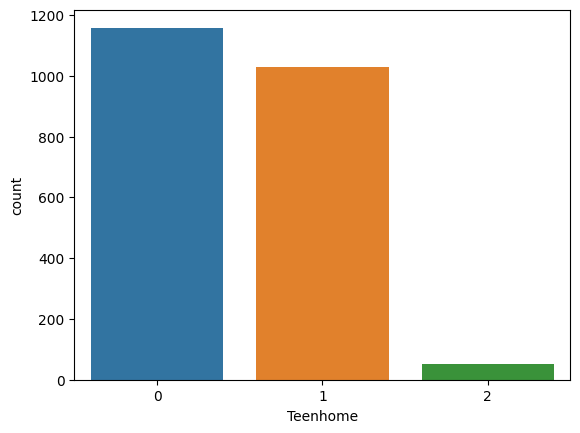

In [ ]:
sns.countplot(data=dataset, x="Teenhome")
plt.show()

 un gráfico de recuento que muestra la distribución de la variable "Teenhome" en el conjunto de personas de la data "dataset". El gráfico representa la cantidad de personas para cada categoría relacionada con la presencia de adolescentes en el hogar, lo que proporciona una visión general de la frecuencia de cada categoría en el conjunto de personas

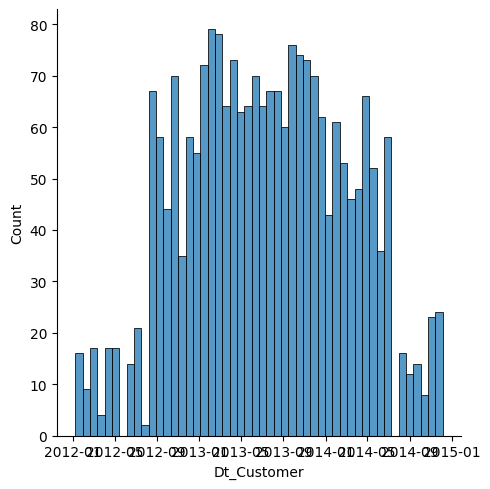

In [ ]:
sns.displot(dataset, x="Dt_Customer", bins =50)

gráfico de distribución que muestra la distribución de las fechas de inscripción en el conjunto de personas de la data "dataset" dividido en 50 bins 

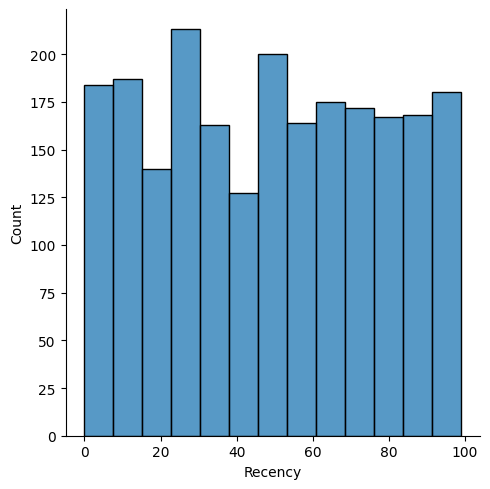

In [ ]:
sns.displot(dataset, x = "Recency")
plt.show()

Un gráfico de distribución que muestra la distribución de los valores de "Recency" en el conjunto de personas de la data "dataset". Proporciona información sobre la frecuencia y la distribución de la variable "Recency" en el conjunto de personas, lo que permite entender la antigüedad o el tiempo transcurrido desde un evento o acción relevante.

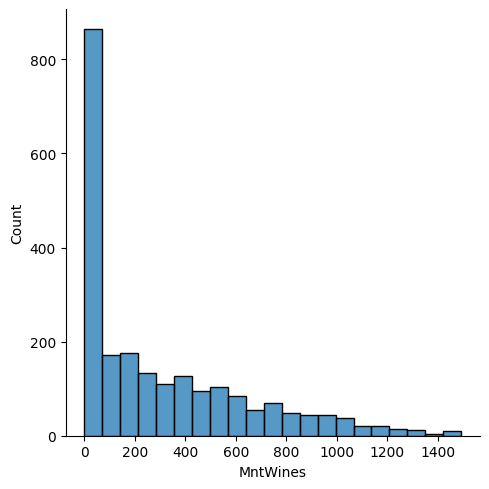

In [ ]:
sns.displot(dataset, x = "MntWines")
plt.show()

un gráfico de distribución que muestra la distribución de los montos "MintWines" en el conjunto de personas del "dataset". Proporciona información sobre la frecuencia y la variabilidad de "MintWines", lo que permite entender la distribución de los montos gastados en esta categoría específica.

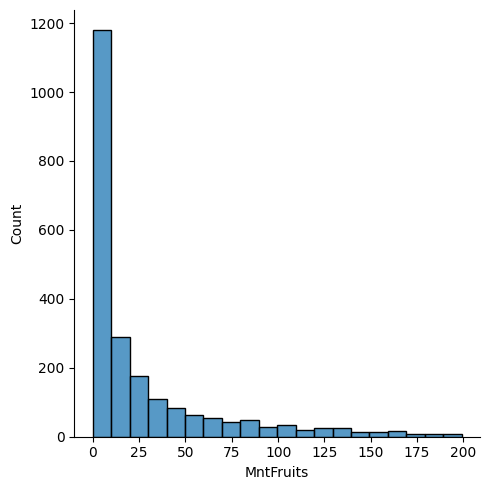

In [ ]:
sns.displot(dataset, x = "MntFruits", bins=20)
plt.show()

gráfico de distribución de los datos del conjunto de personas en la variable "MntFruits", utilizando 20 bins para representar la distribución.

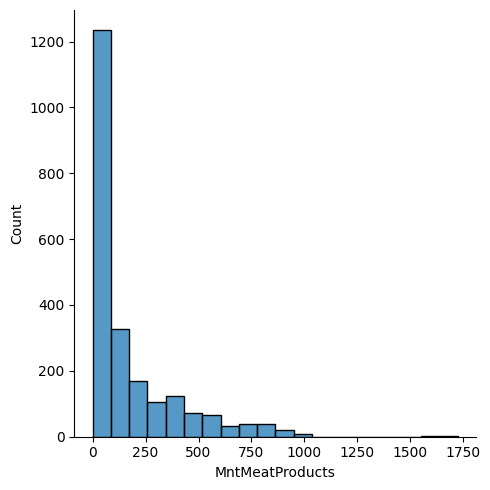

In [ ]:

sns.displot(dataset, x = "MntMeatProducts", bins=20)
plt.show()


gráfico de distribución de los datos del conjunto de personas de la data "dataset" en la variable "MntMeatProducts", utilizando 20 bins para representar la distribución. 

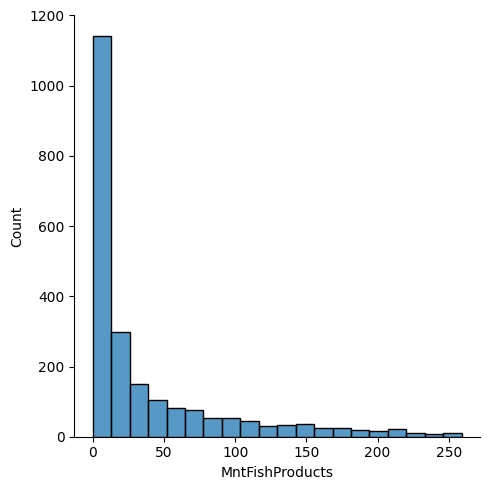

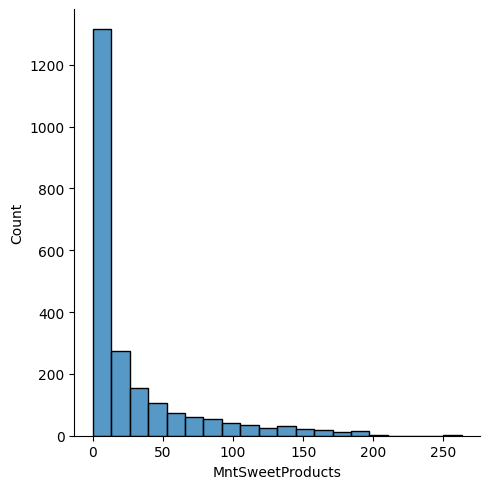

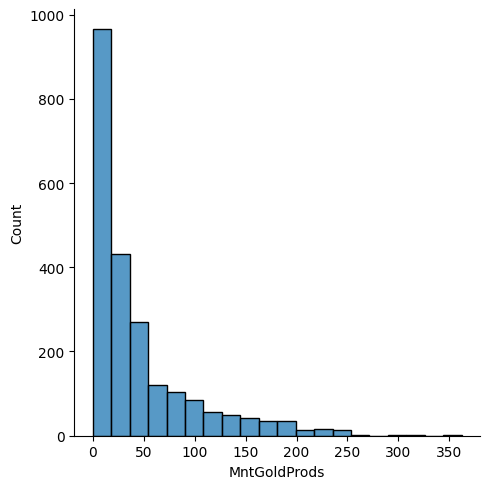

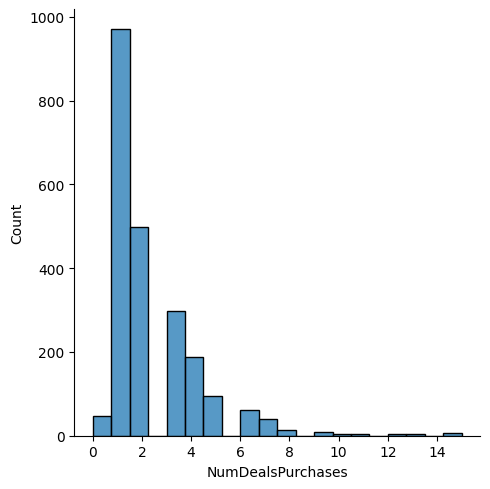

In [ ]:
sns.displot(dataset, x = "MntFishProducts", bins=20)
sns.displot(dataset, x = "MntSweetProducts", bins=20)
sns.displot(dataset, x = "MntGoldProds", bins=20)
sns.displot(dataset, x = "NumDealsPurchases", bins=20)


 el código genera cuatro gráficos de distribución diferentes para las variables "MntFishProducts", "MntSweetProducts", "MntGoldProds" y "NumDealsPurchases" en el conjunto de personas de la data "dataset". En cada gráfico, se utilizan 20 bins para representar la distribución de los datos en cada variable.

In [30]:
#sns.catplot(data=dataset, kind="MntFishProducts", col="MntSweetProducts", x="Marital_Status")
#plt.show()

<ipython-input-29-37dd23117b20>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


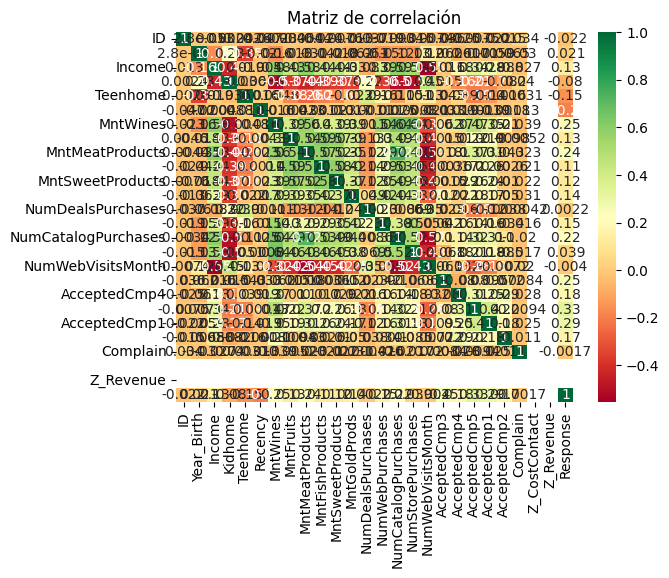

In [29]:
correlation_matrix = dataset.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')
plt.title('Matriz de correlación')
plt.show()

analizando la tabla anterio se evidencia que la variables con mayor correlacion son las variables involucrandas en la compra en los ultimos dos años, como lo son cantidad gastada en vino en los últimos 2 años, cantidad gastada en frutas en los últimos 2 años, cantidad gastada en carne en los últimos 2 años, cantidad gastada en pescado en los últimos 2 años, cantidad gastada en dulces en los últimos 2 años.